Data Science Workshop at US-Korea Conference 2021 LA, December 15, 2021, 2-5pm PT
## Session 2: Introduction to Machine Learning
# *Gradient Boosting Trees using XGBoost and Interpretability with SHAP*

### Instructor and Code Author: Benjamin Lee
### Edited by: Sam Lim

XGBoost is a state-of-the-art tree-based machine learning algorithm and SHAP is a method to explain the outputs of models.

Resource:
* https://neptune.ai/blog/tabular-data-binary-classification-tips-and-tricks-from-5-kaggle-competitions.
* This Jupyter notebook also contains modifications from the textbook "Introduction to Machine Learning with Python: A Guide for Data Scientists". Therefore please do not share or distribute this notebook with those who do not have a legal copy/access of the textbook. If you are a student, your organization may have free access to this book online through O'Reilly.

---

### **Pre-Exercise 1:** Save a Copy
Make a copy of this notebook to your own local drive from the menu at top:
* Click "Copy to Drive" button or
* Click "File" -> "Save a copy in Drive"
* Verify new file name at top begins with "Copy of "

To test if you made a copy successfully run the code below.

If you get a warning that says "**Warning: This notebook was not authored by Google.**" then you did not successfully save a copy. Click Cancel and try again.

In [1]:
print('Hello World')

Hello World


* If successful, you may close the other tab with the master copy file.

### **Pre-Exercise 2:** Load Helper Files
This code copies the lab folder prepared for students from the Google Cloud storage. For background, "gsutil" is a command line tool to access files from the Google Cloud storage.

In [2]:
# UPDATE if still needed
!gsutil -m cp -R 'gs://intro-to-ml' ./  &> /dev/null

And import packages or libraries:

In [3]:
# UPDATE if still needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('intro-to-ml')
from preamble import *
%matplotlib inline
pd.set_option("max_rows", 20)
pd.set_option('max_columns', None)

Note on the key packages are:
* **pandas** is a package in Python that helps to handle lots of data. It helps to sort and clean the data.
* **numpy** is a package that defines a multi-dimensional array object.
* **matplotlib** produces quality 2D graphics



>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (1 min).

---

#**Tree-Based Learning Models**

Decision tree-based ensemble methods combine multiple decision trees to create more power models and are categorized into either bagging or boosting ensembles. 

##A. Decision Trees
But first we start with the foundational model. Decision trees learn a hierarchy of if/else questions, leading to a decision. These questions are similar to the questions you might ask in a game of 20 Questions.  Let’s look at a decision applied to the two_moons dataset, a 2D classification dataset shown below. The dataset consists of two crescent shapes, with each class consisting of 75 data points. The results are shown in figure below:

<div>
<img src="https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/assets/malp_0222b.png" width="700"/>
<img src="https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/assets/malp_0222c.png" width="700"/>
<img src="https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/assets/malp_0222d.png" width="700"/>
</div>


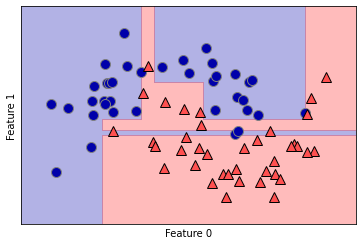

In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3) # Collect data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0) # Split the data in two groups: train and test // stratifies so that the two groups labels are proportional
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train) # Build a classifier and fit the model

mglearn.plots.plot_2d_separator(tree, X_train, fill=True, alpha=.3) # Area plot for distinguishing region
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) # Scatter plot for showing trained data points
# mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test) # Scatter plot for showing test data points // uncomment this line to see

plt.xlabel("Feature 0") 
plt.ylabel("Feature 1"); # Adds x and y axis label on the plot

Decision trees are easily visualized and interpretable and require no normalization of the data. But they tend to overfit and generalize poorly.

##B. Bagging of Decision Trees
####*Random Forests*

Bagging, a contraction of bootstrap aggregating, either averages or majority votes on the outputs of individual models that were trained in parallel on different subsets of the training data. Random Forest is an example that uses bagging on individual decision trees.

A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. While each tree may overfit, the average of their results will reduce the overfitting. Random forests get their name from injecting randomness into the tree building to ensure each tree is different.

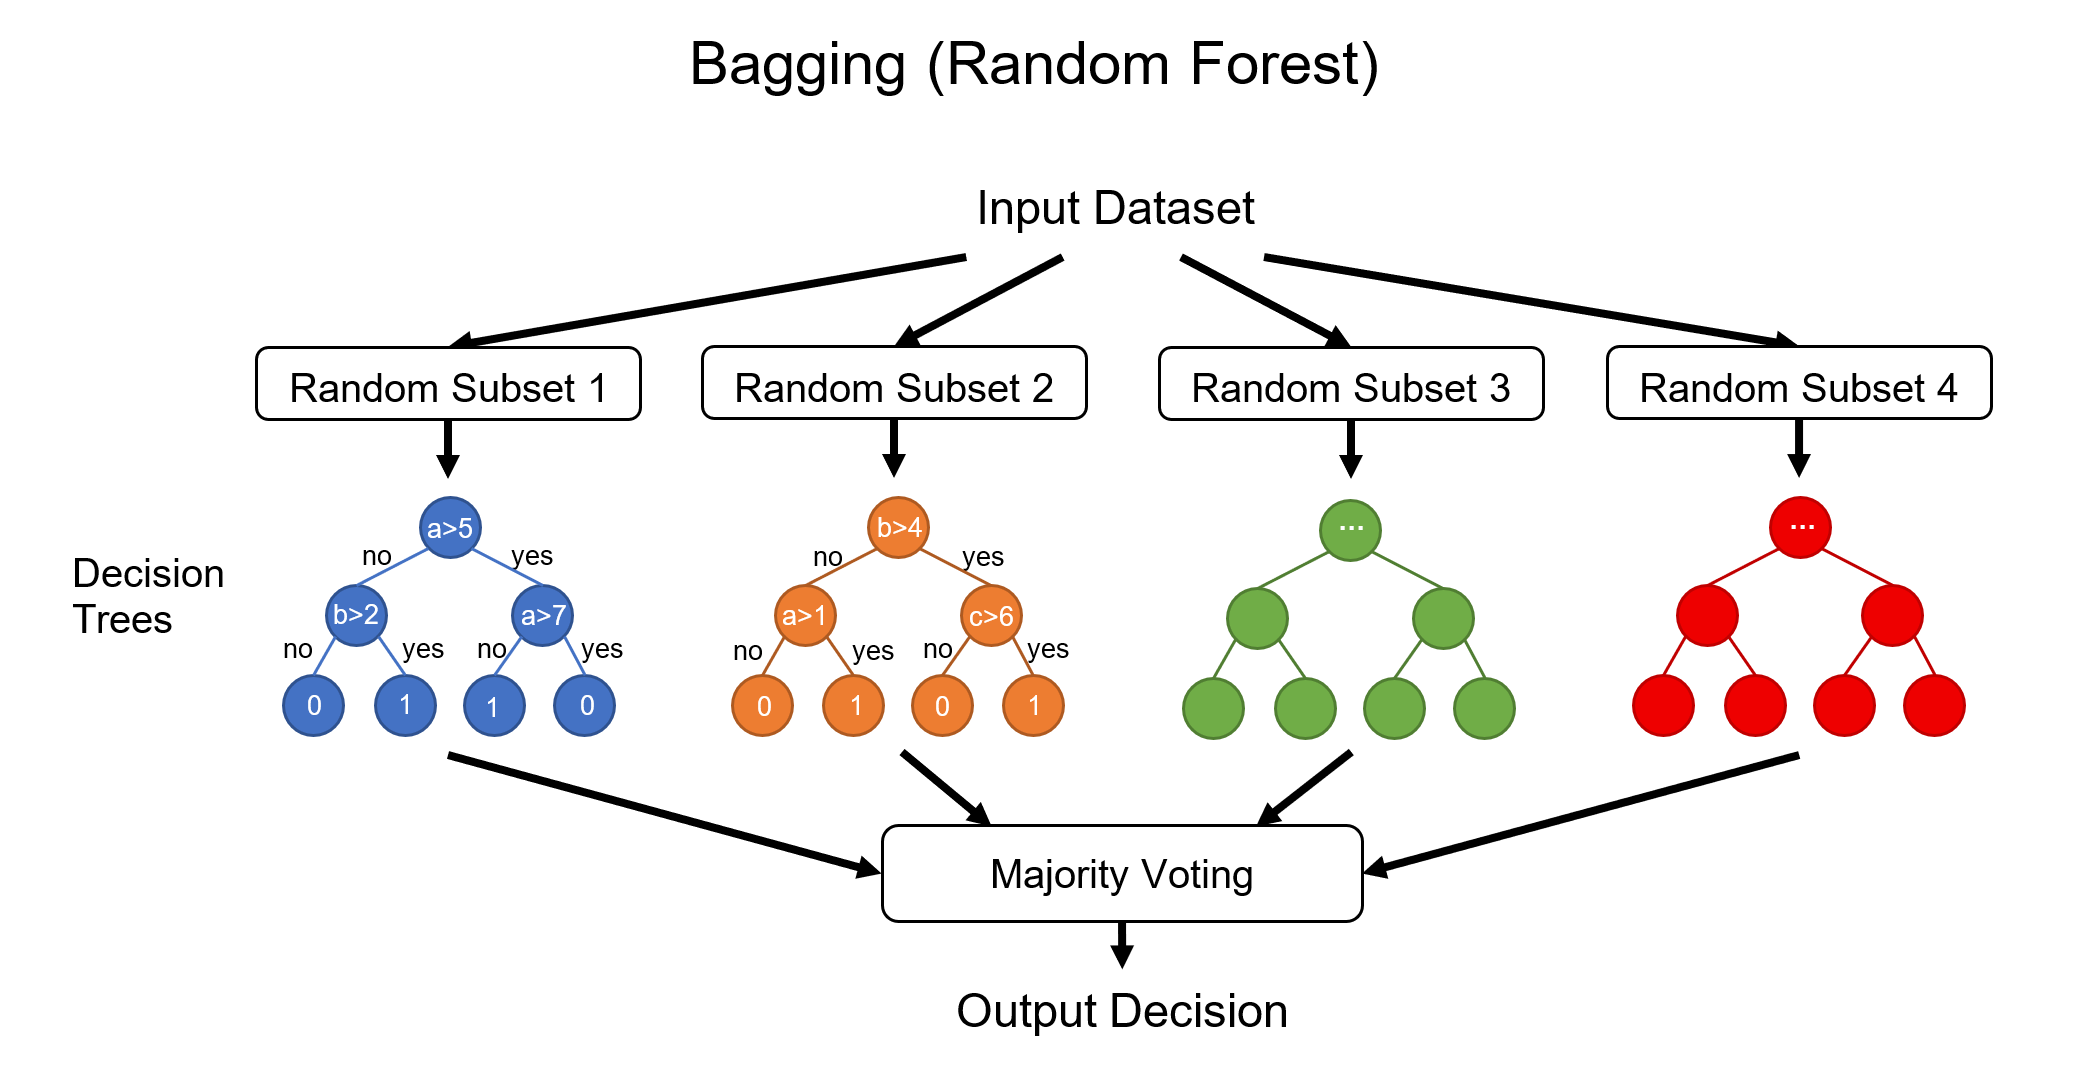

*Source: Lee BC, et al. Machine Learning in Cardiovascular Medicine. 2020. p.268*

Let’s apply a random forest consisting of 5 trees to the two_moons dataset we studied earlier:

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

Let’s visualize the decision boundaries learned by each tree, together with their aggregate prediction as made by the forest.

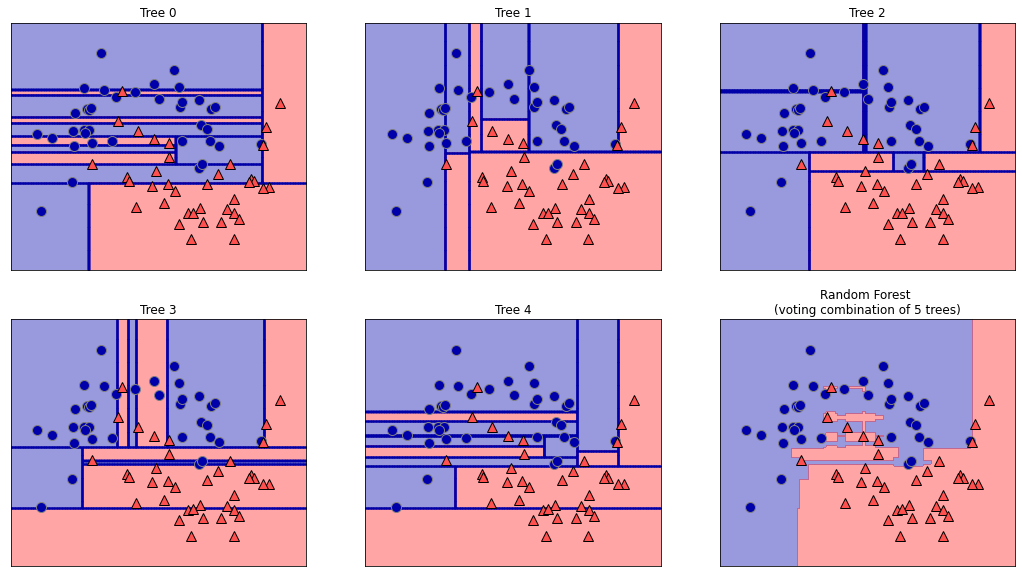

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4);
axes[-1, -1].set_title("Random Forest \n(voting combination of 5 trees)")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train);

You can clearly see that the decision boundaries learned by the five trees are quite different. Each of them makes some mistakes, as some of the training points that are plotted here were not actually included in the training sets of the trees, due to the random sampling with replacement (or bootstrap sampling).

The random forest overfits less than any of the trees individually, and provides a much more intuitive decision boundary. In any real application, we would use many more trees (often hundreds or thousands), leading to even smoother boundaries.

Random forests are widely used since they work well on very large datasets, fast, and they work well with unbalanced and missing data. However, their ensemble of many trees make them difficult to interpret, models vary due to random seed, and don't perform well on large numbers of features.

##C. Boosting of Decision Trees
####*Gradient Boosting*
Boosting is a method that sequences individual weak learning models, with increased weights iteratively placed on the previously incorrectly predicted training cases, thus converting the weak models to a stronger ensembled learning model. Gradient Boosting uses gradients of the errors to train itself. Gradient boosting is also referred to as *gradient boosting machine*, *gradient tree boosting* or *gradient boosting decision tree*.


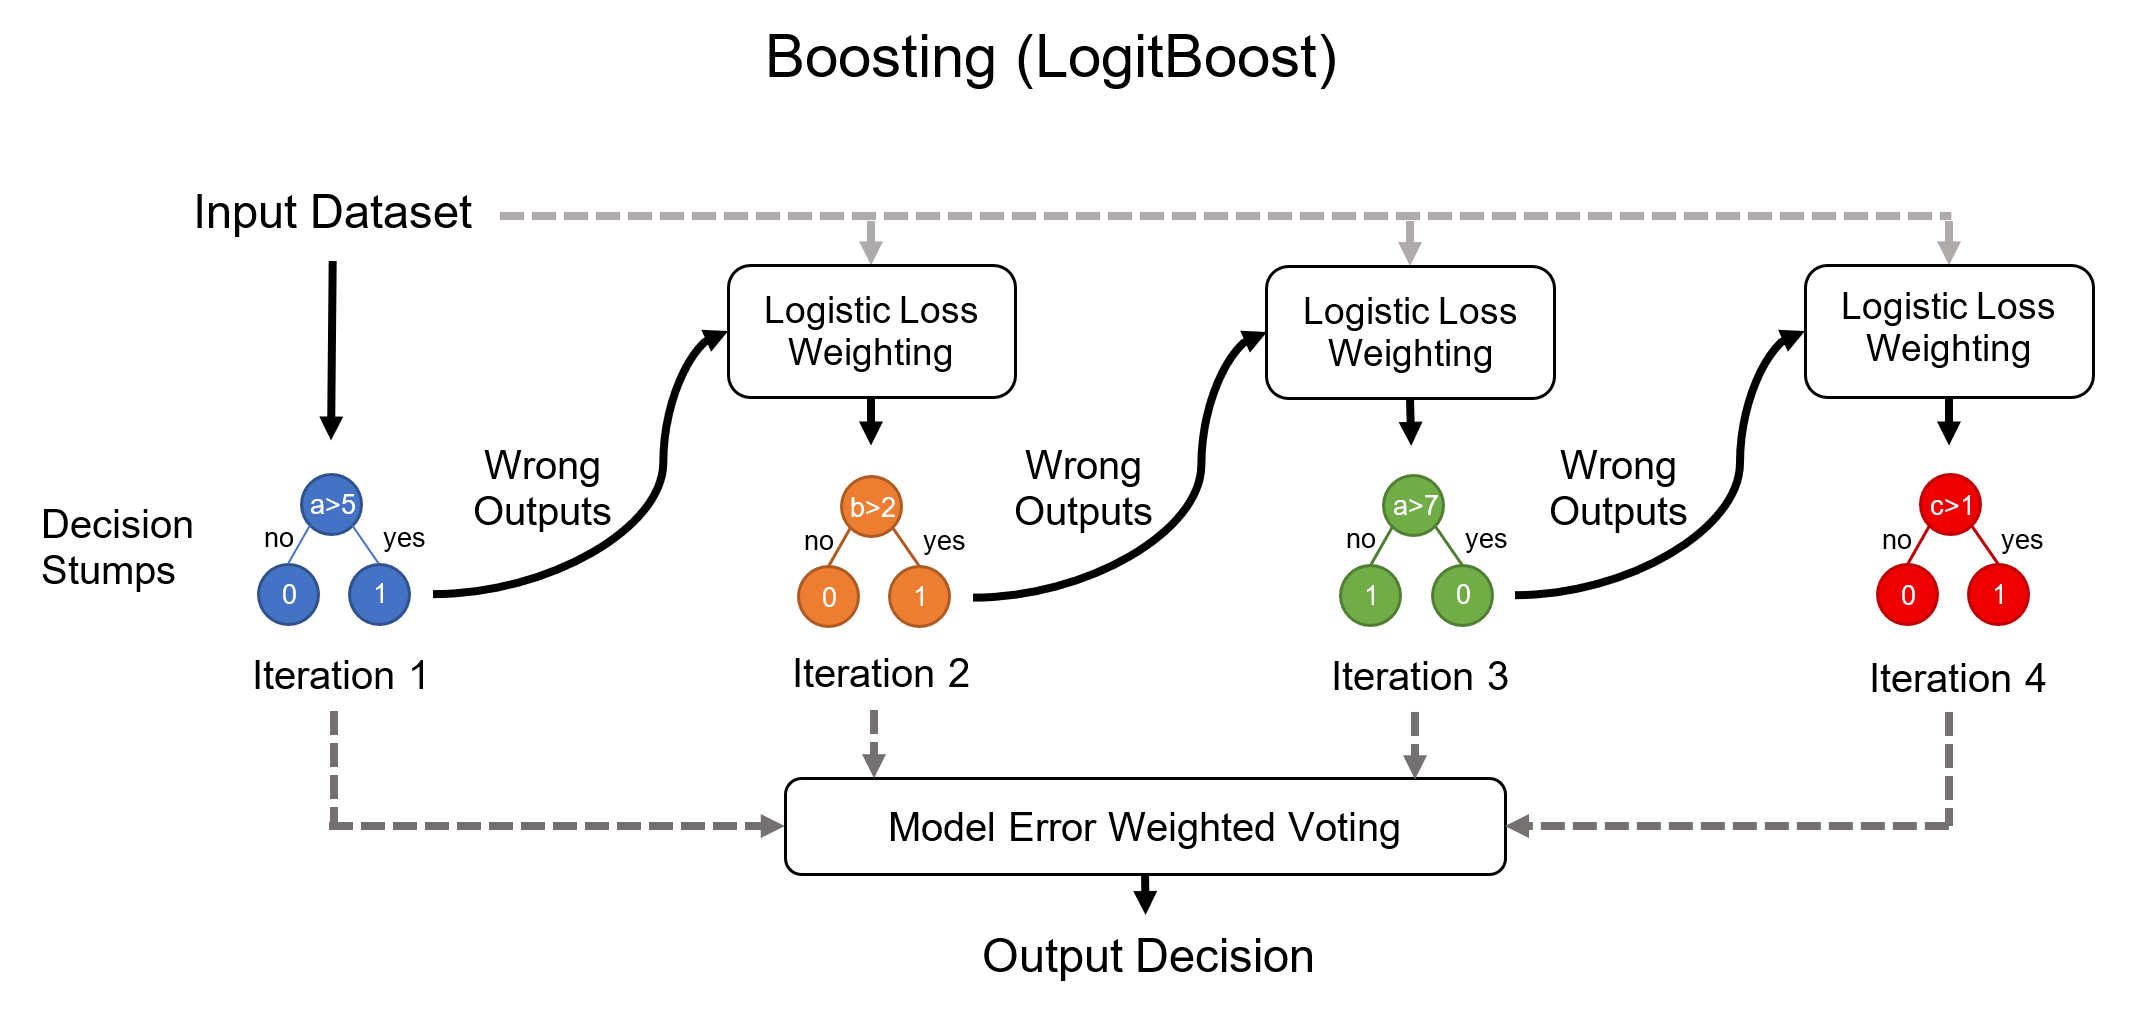

Let’s apply gradient boosting consisting of 5 sequential trees to the two_moons dataset we studied earlier:

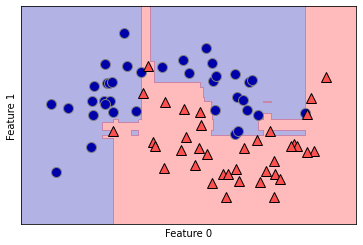

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(random_state=2) # default: max_depth': 3, 'n_estimators': 100,
boost.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(boost, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

Let us increase the number of estimators to 20 and see.

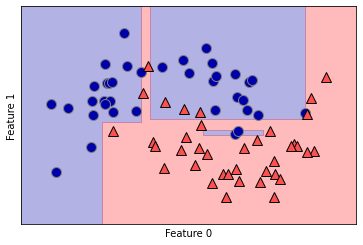

In [13]:
boost = GradientBoostingClassifier(n_estimators=20, random_state=2) # default: max_depth': 3
boost.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(boost, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

We will try to set the max depth to 1 and also see.

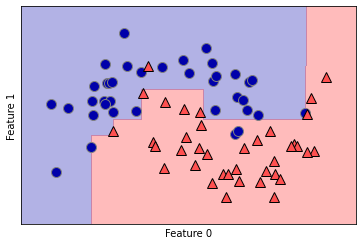

In [14]:
boost = GradientBoostingClassifier(max_depth=1, random_state=2) # default: 'n_estimators': 100,
boost.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(boost, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

##D. XGBoost
XGBoost, which stands for Extreme Gradient Boosting, is a gradient boosting algorithm with many algorithmic improvements that reduce overfitting, run an order of magnitude faster than its predecessors, handles missing data, and are well suited on large datasets.


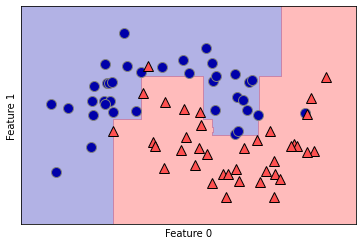

In [15]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(random_state=2) # default: max_depth: 3, n_estimators=100, 
xgboost.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(xgboost, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (1 min).

---

##E. Real-World Data Example

Let’s look at the Breast Cancer dataset. While the data originated from images of breast cancer cells under the microscope shown below are for illustrative purposes, the dataset we will be using are numerical features measured from these images, and formatted into a spreadsheet format of rows and columns instead of actual images as inputs. 

<img src="https://miro.medium.com/max/875/0*b10UHrarzk6D1oXy.png">

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

# Display data as pandas dataframe
dfData = pd.DataFrame(cancer.data, columns=cancer.feature_names)
display(dfData)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,6.40e-03,4.90e-02,0.05,0.02,0.03,6.19e-03,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,5.22e-03,1.31e-02,0.02,0.01,0.01,3.53e-03,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,6.15e-03,4.01e-02,0.04,0.02,0.02,4.57e-03,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,9.11e-03,7.46e-02,0.06,0.02,0.06,9.21e-03,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,1.15e-02,2.46e-02,0.06,0.02,0.02,5.11e-03,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11,0.12,0.24,0.14,0.17,0.06,1.18,1.26,7.67,158.70,1.03e-02,2.89e-02,0.05,0.02,0.01,4.24e-03,25.45,26.40,166.10,2027.0,0.14,0.21,0.41,0.22,0.21,0.07
565,20.13,28.25,131.20,1261.0,0.10,0.10,0.14,0.10,0.18,0.06,0.77,2.46,5.20,99.04,5.77e-03,2.42e-02,0.04,0.02,0.02,2.50e-03,23.69,38.25,155.00,1731.0,0.12,0.19,0.32,0.16,0.26,0.07
566,16.60,28.08,108.30,858.1,0.08,0.10,0.09,0.05,0.16,0.06,0.46,1.07,3.42,48.55,5.90e-03,3.73e-02,0.05,0.02,0.01,3.89e-03,18.98,34.12,126.70,1124.0,0.11,0.31,0.34,0.14,0.22,0.08
567,20.60,29.33,140.10,1265.0,0.12,0.28,0.35,0.15,0.24,0.07,0.73,1.59,5.77,86.22,6.52e-03,6.16e-02,0.07,0.02,0.02,6.19e-03,25.74,39.42,184.60,1821.0,0.17,0.87,0.94,0.27,0.41,0.12


Display targets or output labels

In [17]:
targetStacked=np.vstack((cancer.target,1-cancer.target)).T
dfTarget = pd.DataFrame(targetStacked, columns=cancer.target_names)
display(dfTarget)

,malignant,benign
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


Let’s apply a **decision tree** on the Breast Cancer dataset:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:5.3f}%".format(tree.score(X_train, y_train)*100))
print("Accuracy on     test set: {:5.3f}% <<".format(tree.score(X_test, y_test)*100))

Accuracy on training set: 100.000%
Accuracy on     test set: 93.706% <<


Let’s apply a **random forest** consisting of 100 trees on the Breast Cancer dataset:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:5.3f}%".format(forest.score(X_train, y_train)*100))
print("Accuracy on     test set: {:5.3f}% <<".format(forest.score(X_test, y_test)*100))

Accuracy on training set: 100.000%
Accuracy on     test set: 97.203% <<


The random forest gives us an accuracy of 97.2%, better than the linear models or a single decision tree (94-95%), without tuning any parameters.

Let’s apply **gradient boosting** consisting of 100 trees on the Breast Cancer dataset:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
boost = GradientBoostingClassifier(n_estimators=100, random_state=0)
boost.fit(X_train, y_train)

print("Accuracy on training set: {:5.3f}%".format(boost.score(X_train, y_train)*100))
print("Accuracy on     test set: {:5.3f}% <<".format(boost.score(X_test, y_test)*100))

Accuracy on training set: 100.000%
Accuracy on     test set: 96.503% <<


Let’s apply **XGBoost** consisting of 100 trees on the Breast Cancer dataset:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
xgboost = XGBClassifier(n_estimators=100, random_state=0)
xgboost.fit(X_train, y_train)

print("Accuracy on training set: {:5.3f}%".format(xgboost.score(X_train, y_train)*100))
print("Accuracy on     test set: {:5.3f}% <<".format(xgboost.score(X_test, y_test)*100))

Accuracy on training set: 100.000%
Accuracy on     test set: 97.902% <<


>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (1 min).

### **Exercise 1:** XGBoost Optimization
Try changing the hyperparameter "n_estimators" greater than 100 or less than 100 to see which gives the best accuracy

In [22]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
xgboost = XGBClassifier(n_estimators=100, random_state=0)
xgboost.fit(X_train, y_train)

print("Accuracy on training set: {:5.3f}%".format(xgboost.score(X_train, y_train)*100))
print("Accuracy on     test set: {:5.3f}% <<".format(xgboost.score(X_test, y_test)*100))

Accuracy on training set: 100.000%
Accuracy on     test set: 97.902% <<


>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (2 min).

---

Let us go back to the original hyperparameter setting.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
xgboost = XGBClassifier(n_estimators=100, random_state=0)
xgboost.fit(X_train, y_train)

print("Accuracy on training set: {:5.3f}%".format(xgboost.score(X_train, y_train)*100))
print("Accuracy on     test set: {:5.3f}% <<".format(xgboost.score(X_test, y_test)*100))

Accuracy on training set: 100.000%
Accuracy on     test set: 97.902% <<


XGBoost will show us basic feature importances

In [24]:
xgboost.feature_importances_

array([0.024, 0.026, 0.   , 0.001, 0.008, 0.007, 0.007, 0.342, 0.006,
       0.001, 0.015, 0.002, 0.013, 0.015, 0.015, 0.009, 0.014, 0.001,
       0.003, 0.01 , 0.048, 0.024, 0.116, 0.036, 0.013, 0.008, 0.024,
       0.198, 0.007, 0.006], dtype=float32)

Here we show the feature names again

In [25]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

And we can more visually plot these

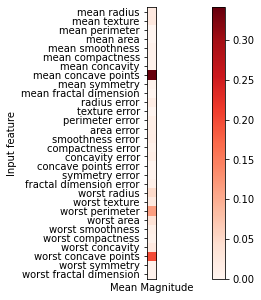

In [26]:
plt.figure(figsize=(20, 5))
mean_mag_coefs = np.abs(xgboost.feature_importances_)[:,np.newaxis]
plt.imshow(mean_mag_coefs, interpolation='none', cmap='Reds')
plt.yticks(range(30), cancer.feature_names)
plt.ylabel("Input feature")
plt.xticks([])
plt.xlabel("Mean Magnitude")
plt.colorbar();

You can see "mean concave points", "worst concave points" and "worst perimeter" show the greatest importance.

>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (1 min).

---

#**SHAP Interpretability**

##F. Install SHAP

Machine learning models often can be criticized for being a black box.  Model interpretabtiliy tries to show the relationship between model features and ouputs.

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.

<img src="https://shap.readthedocs.io/en/latest/_images/shap_header.png">

Source: https://shap.readthedocs.io/en/latest/index.html

We need to first install the SHAP package

In [27]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.4 MB/s 


>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (1 min).

Now we import shap and then given our prior train XGBoost model we compute the SHAP values based on the training data.

In [28]:
import shap
xgb_explainer = shap.TreeExplainer(xgboost, X_train, feature_perturbation='interventional')

##G. SHAP Individual Force Plot

The first plot we can now show is the individual force plot of a patient with a malignancy.

In [29]:
indPat = 1
shap_values_individual = xgb_explainer.shap_values(X_test[indPat,:])

print("Probability(malignant): ", xgboost.predict_proba(X_test)[indPat,1])
shap.initjs()
shap.force_plot(xgb_explainer.expected_value, shap_values_individual, X_test[indPat,:], feature_names=cancer.feature_names)

Probability(malignant):  0.9804575


We also show an individual force plot of a patient without malignancy.

In [30]:
indPat = 42
shap_values_individual = xgb_explainer.shap_values(X_test[indPat,:])

print("Probability(malignant): ", xgboost.predict_proba(X_test)[indPat,1])
shap.initjs()
shap.force_plot(xgb_explainer.expected_value, shap_values_individual, X_test[indPat,:], feature_names=cancer.feature_names)

Probability(malignant):  0.27882448


##H. SHAP Global Summary Plots

Next we compute the SHAP values for all of the training datasets

In [31]:
shap_values = xgb_explainer.shap_values(X_train)
base_shap = xgb_explainer.expected_value

And we show a bar plot of aggregrate shap values like the feature importance plots

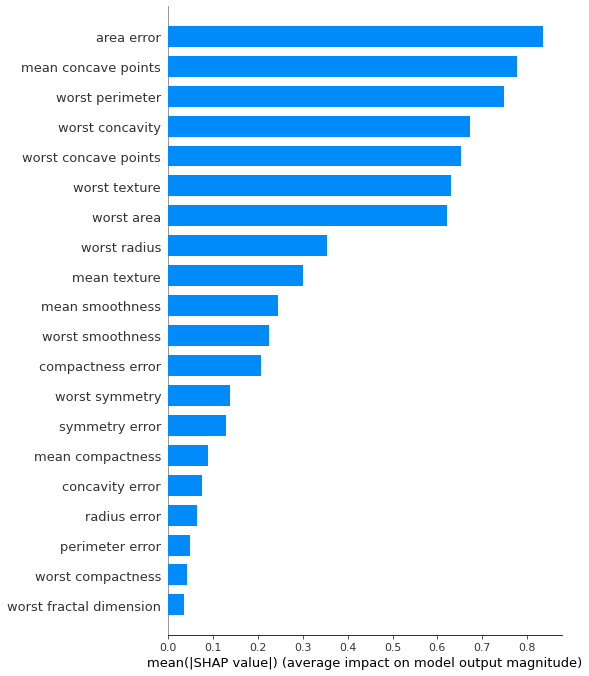

In [32]:
shap.summary_plot(shap_values, X_train, feature_names=cancer.feature_names, plot_type='bar')

The above does not show the direction of the relationship of each feature with the predicted output.

We will then display the SHAP summary plot with a colorbar to show the feature values. 

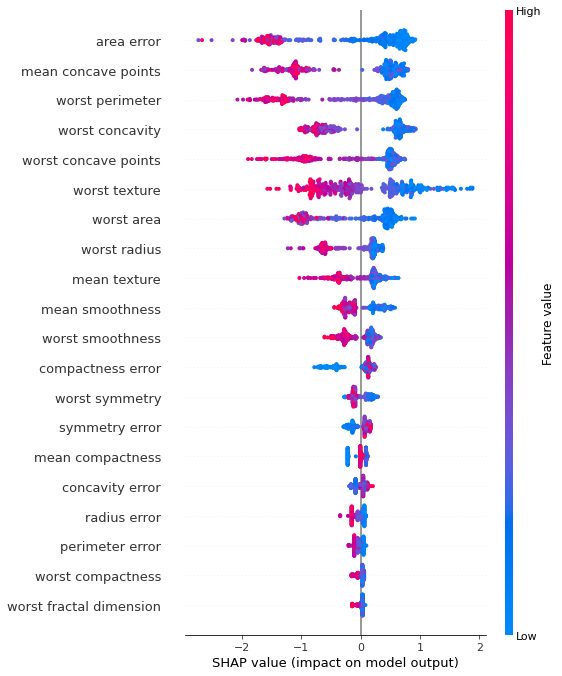

In [33]:
shap.summary_plot(shap_values, X_train, feature_names=cancer.feature_names)

>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (1 min).

##I. SHAP Interaction Plots

Last we show the SHAP interaction plots to show the relationships between two features to see any higher order interactions. 

We print the feature names again.

In [34]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Here we see the first SHAP scatter plot.

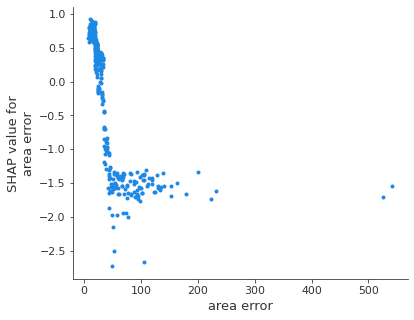

In [35]:
shap.dependence_plot('area error', shap_values, X_train, interaction_index=None, feature_names=cancer.feature_names)

Now we add the interaction with the color map.

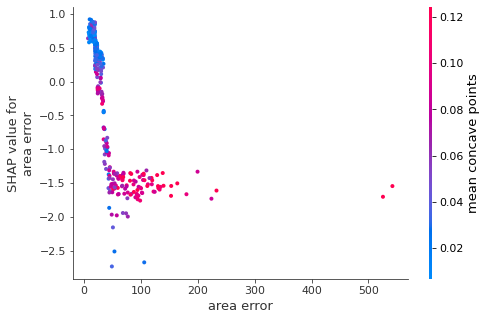

In [36]:
shap.dependence_plot('area error', shap_values, X_train, interaction_index='mean concave points', feature_names=cancer.feature_names)

And with other features.

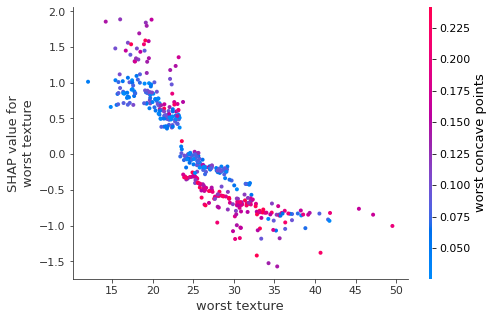

In [37]:
feature_main = 'worst texture'
feature_interact = 'worst concave points'
shap.dependence_plot(feature_main, shap_values, X_train, interaction_index=feature_interact, feature_names=cancer.feature_names)

For the next exercise let's bring up the features again.

In [38]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (1 min).

### **Exercise 2:** SHAP Interaction Plots
Try plotting other features to see their dependence

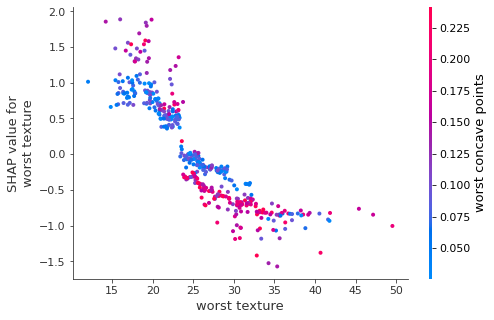

In [39]:
feature_main = 'worst texture'
feature_interact = 'worst concave points'
shap.dependence_plot(feature_main, shap_values, X_train, interaction_index=feature_interact, feature_names=cancer.feature_names)

>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (2 min).

---